# Main Ingredients

Now that you have learned many of the fundamental procedures executed in deep learning models, the notebooks that follow will provide various examples using the Python API. These notebooks are designed to closely mirror the complementary R notebooks.

In [8]:
# utility packages
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [9]:

# modeling packages
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_blobs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import utils

## Simple Linear Regression

In [10]:
n = 1000   # n observations
b = 30     # intercept
a = 5      # slope

In [11]:
random.seed(123)
X = [random.uniform(-1, 1) for ob in range(n)]
y = [b + a*ob + random.uniform(-1, 1) for ob in X]

df = pd.DataFrame({'X': X, 'y': y})
df.head()

,X,y
0,-0.895273,24.651331
1,-0.825627,26.812954
2,-0.185516,29.257534
3,-0.784600,26.488911
4,0.802398,34.809165


<AxesSubplot:xlabel='X', ylabel='y'>

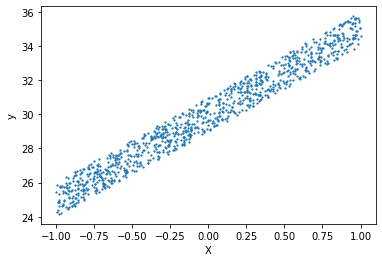

In [12]:
df.plot.scatter(x='X', y='y', s=1.5)

In [13]:
X = df[['X']]
y = df['y']

reg = LinearRegression().fit(X, y)

print(f'''
estimated intercept = {reg.coef_}
estimated slope = {reg.intercept_}
loss score = {mean_squared_error(y, reg.predict(X))}
''')


estimated intercept = [5.03266661]
estimated slope = 29.99919365105621
loss score = 0.33470234042376534



## Simple regression with a perceptron

In [14]:
# define the keras model
model = Sequential()
model.add(Dense(units=1, input_dim=1))

In [15]:
# compile the keras model
model.compile(loss='mse', optimizer='sgd')

In [16]:
# Fit the model
model.fit(X, y, batch_size=32, epochs=15)

Epoch 1/15


2022-11-20 14:25:54.318078: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-20 14:25:54.439870: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 1s 5ms/step - loss: 526.2274
Epoch 2/15
32/32 [==============================] - 0s 4ms/step - loss: 150.0753
Epoch 3/15
32/32 [==============================] - 0s 4ms/step - loss: 44.7118
Epoch 4/15
32/32 [==============================] - 0s 4ms/step - loss: 14.6666
Epoch 5/15
32/32 [==============================] - 0s 4ms/step - loss: 5.6200
Epoch 6/15
32/32 [==============================] - 0s 4ms/step - loss: 2.6777
Epoch 7/15
32/32 [==============================] - 0s 4ms/step - loss: 1.5751
Epoch 8/15
32/32 [==============================] - 0s 4ms/step - loss: 1.0655
Epoch 9/15
32/32 [==============================] - 0s 4ms/step - loss: 0.7875
Epoch 10/15
32/32 [==============================] - 0s 4ms/step - loss: 0.6246
Epoch 11/15
32/32 [==============================] - 0s 4ms/step - loss: 0.5217
Epoch 12/15
32/32 [==============================] - 0s 4ms/step - loss: 0.4567
Epoch 13/15
32/32 [==============================] - 0

In [17]:
model.get_weights()

[array([[4.747691]], dtype=float32), array([29.97871], dtype=float32)]

## Binary Classification

In [18]:
X, y = make_blobs(n_samples=1000, centers=2, n_features=1)

In [19]:
pd.DataFrame({'X': np.squeeze(X), 'y': y}).head()

,X,y
0,-5.572441,1
1,-3.775603,1
2,-4.343552,1
3,-1.877856,0
4,-4.282569,1


In [20]:
# define the keras model
model = Sequential()
model.add(Dense(units=1, input_dim=1, activation = "sigmoid"))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='sgd')

# fit the model
history = model.fit(X, y, epochs=50, verbose=False)

2022-11-20 14:25:57.526134: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [21]:
model.evaluate(X, y)

32/32 [==============================] - 0s 4ms/step - loss: 0.0992


2022-11-20 14:26:05.052620: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


0.09924425184726715

<AxesSubplot:xlabel='epoch', ylabel='loss'>

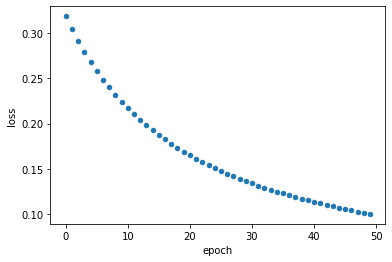

In [22]:
pd.DataFrame({
    'epoch': history.epoch,
    'loss': history.history['loss']
}).plot.scatter(x='epoch', y='loss')

## Learning rate and momentum

In [23]:
# define the keras model
model = Sequential()
model.add(Dense(units=1, input_dim=1, activation = "sigmoid"))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=0.2))

# fit the model
model.fit(X, y, epochs=10)

Epoch 1/10
23/32 [====================>.........] - ETA: 0s - loss: 0.2489

2022-11-20 14:26:05.445338: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 0s 6ms/step - loss: 0.2318
Epoch 2/10
32/32 [==============================] - 0s 5ms/step - loss: 0.1380
Epoch 3/10
32/32 [==============================] - 0s 5ms/step - loss: 0.1006
Epoch 4/10
32/32 [==============================] - 0s 5ms/step - loss: 0.0806
Epoch 5/10
32/32 [==============================] - 0s 5ms/step - loss: 0.0680
Epoch 6/10
32/32 [==============================] - 0s 5ms/step - loss: 0.0594
Epoch 7/10
32/32 [==============================] - 0s 5ms/step - loss: 0.0532
Epoch 8/10
32/32 [==============================] - 0s 5ms/step - loss: 0.0484
Epoch 9/10
32/32 [==============================] - 0s 5ms/step - loss: 0.0446
Epoch 10/10
32/32 [==============================] - 0s 5ms/step - loss: 0.0416


In [24]:
# define the keras model
model = Sequential()
model.add(Dense(units=1, input_dim=1, activation = "sigmoid"))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=0.01, momentum=0.5))

# fit the model
model.fit(X, y, epochs=10)

Epoch 1/10
 1/32 [..............................] - ETA: 9s - loss: 0.3374

2022-11-20 14:26:07.276177: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 0s 6ms/step - loss: 0.3127
Epoch 2/10
32/32 [==============================] - 0s 4ms/step - loss: 0.2862
Epoch 3/10
32/32 [==============================] - 0s 4ms/step - loss: 0.2638
Epoch 4/10
32/32 [==============================] - 0s 4ms/step - loss: 0.2448
Epoch 5/10
32/32 [==============================] - 0s 4ms/step - loss: 0.2283
Epoch 6/10
32/32 [==============================] - 0s 4ms/step - loss: 0.2139
Epoch 7/10
32/32 [==============================] - 0s 4ms/step - loss: 0.2015
Epoch 8/10
32/32 [==============================] - 0s 4ms/step - loss: 0.1902
Epoch 9/10
32/32 [==============================] - 0s 5ms/step - loss: 0.1803
Epoch 10/10
32/32 [==============================] - 0s 4ms/step - loss: 0.1713


## Non-linear Patterns

<AxesSubplot:xlabel='X', ylabel='y'>

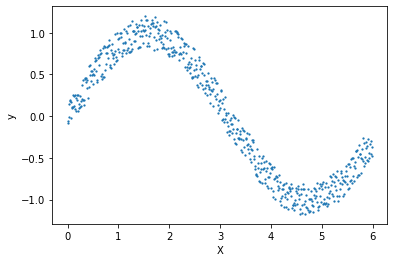

In [25]:
df = pd.DataFrame({
    'X': np.arange(0, 6, 0.01),
    'y': np.sin(np.arange(0, 6, 0.01))
})

# add random noise to response variable
e = np.random.uniform(-0.2, 0.2, (df.shape[0], 1))
df[['y']] = df[['y']] + e

# plot
df.plot.scatter(x='X', y='y', s=1.5)

In [26]:
X = df[['X']]
y = df['y']

In [27]:
# define the keras model
model = Sequential()
model.add(Dense(units=16, input_dim=1, activation = "relu"))
model.add(Dense(units=1))

# compile the keras model
model.compile(loss='mse', optimizer=SGD(learning_rate=0.01, momentum=0.9))

# fit the model
model.fit(X, y, batch_size=32, epochs=50, verbose=False)

2022-11-20 14:26:09.452399: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


19/19 [==============================] - 0s 2ms/step


2022-11-20 14:26:13.373969: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


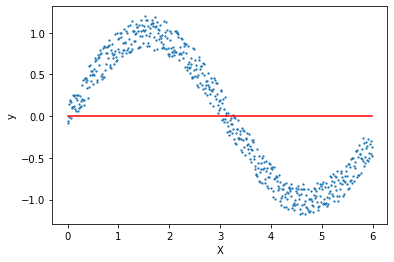

In [28]:
df[['pred']] = model.predict(X)
# plot
df.plot.scatter(x='X', y='y', s=1.5)
plt.plot(df[['X']], df[['pred']], c='red')

2022-11-20 14:26:13.886104: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


19/19 [==============================] - 0s 3ms/step


2022-11-20 14:26:21.782390: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


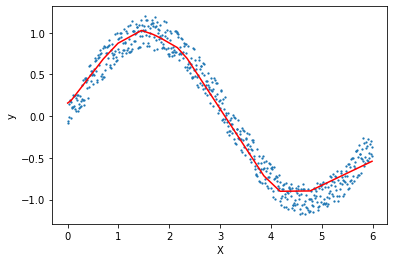

In [29]:
# define the keras model
model = Sequential()
model.add(Dense(units=16, input_dim=1, activation="relu"))
model.add(Dense(units=16, activation="relu"))
model.add(Dense(units=1))

# compile the keras model
model.compile(loss='mse', optimizer=SGD(learning_rate=0.01, momentum=0.9))

# fit the model
model.fit(X, y, batch_size=16, epochs=50, verbose=False)
          
# plot results
df[['pred']] = model.predict(X)
# plot
df.plot.scatter(x='X', y='y', s=1.5)
plt.plot(df[['X']], df[['pred']], c='red')

## Multi-predictor Multi-class Classification

In [30]:
X, y = make_blobs(n_samples=2000, centers=4, n_features=3)

In [31]:
# categorical encoding of y array
y = utils.to_categorical(y)
y

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]], dtype=float32)

In [32]:
X.shape[1]

3

In [33]:
y.shape

(2000, 4)

### Fit model using validation

In [34]:
# define the keras model
model = Sequential()
model.add(Dense(units=16, input_dim=X.shape[1], activation="relu"))
model.add(Dense(units=y.shape[1], activation='softmax'))

# compile the keras model
model.compile(
    loss='categorical_crossentropy', 
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    metrics='accuracy'
)

# fit the model
history = model.fit(X, y, batch_size=32, epochs=20, validation_split=0.2, verbose=False)

2022-11-20 14:26:22.170637: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-11-20 14:26:23.224363: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


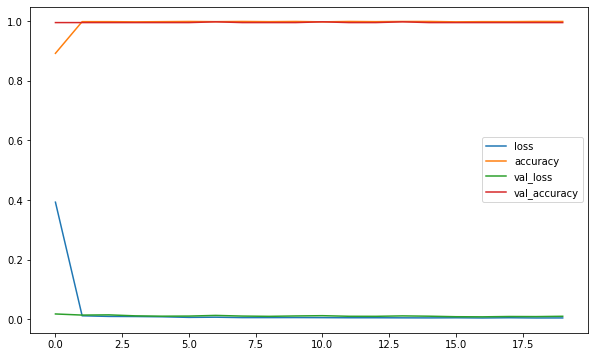

In [35]:
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.show()